# Learning models & methods

In this notebook you'll get used with the notions of classification & regression

---

## Task 1: Classification & Regression

### What is Classification?
Classification involves predicting a discrete category or class label. For example:
- Predicting whether an email is **spam** or **not spam**.
- Predicting the species of a flower.

### What is Regression?
Regression involves predicting a continuous value. For example:
- Predicting house prices.
- Estimating the temperature for tomorrow.

In this section, you will:
1. Implement two classification methods: Decision Trees and k-Nearest Neighbors (k-NN) using the Iris dataset.
2. Implement one regression method: Linear Regression using the diabete dataset.

For each model:
- Split the dataset into training and testing sets.
- Train the model on the training set.
- Evaluate the model on the testing set using appropriate metrics.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In this section, you will:
1. Implement two classification methods: Decision Trees and k-Nearest Neighbors (k-NN) using the Iris dataset.
2. Implement one regression method: Linear Regression using the California Housing dataset.

For each model:
- Split the dataset into training and testing sets.
- Train the model on the training set.
- Evaluate the model on the testing set using appropriate metrics.

---

### Classification Tasks
#### Exercise 1: Decision Tree Classifier
Load the Iris dataset and split it into train and test, use only the first two features of the dataset (sepal length & width). 

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris['data'][:, :2]
y = iris['target']

# Split the Iris dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a Decision Tree Classifier with `sklearn.tree.DecisionTreeClassifier()` and train it using the `fit()` function. You can try different values for the maximum depth.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Make predictions using the `predict()` function and compare the results with the target values.

In [6]:
# Make predictions and compare
y_pred = dt_clf.predict(X_test)
print("Predicted values", y_pred)
print("Target values", y_test)

Predicted values [1 0 2 2 2 0 1 1 1 2 1 0 1 0 0 2 2 2 1 2 0 1 0 2 2 1 1 2 0 0]
Target values [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Here is a function to visualuze decision boundaries, try to understand what it's doing and use it to plot the boundaries of your decision tree model.

You can also use the `sklearn.tree.plot_tree` function to visualize the tree architecture and try to understand what is each node doing.

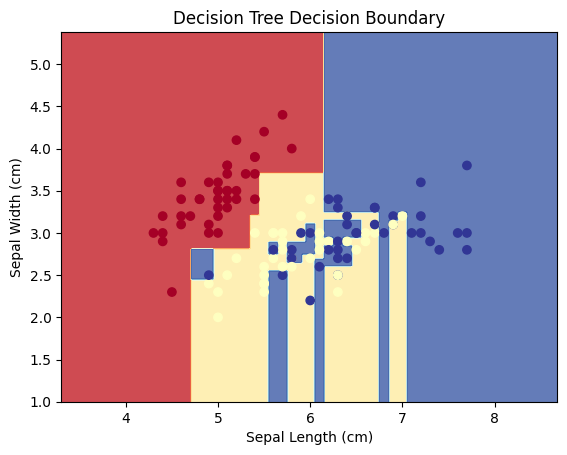

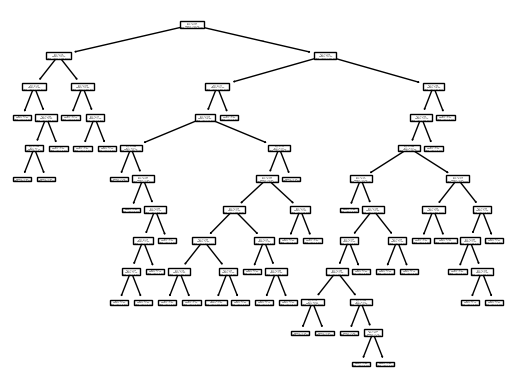

In [ ]:
from sklearn.tree import plot_tree

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.show()

# Visualize the boundaries and the tree architecture
plot_decision_boundary(dt_clf, X_train, y_train, title="Decision Tree Decision Boundary")
plot_tree(dt_clf)
plt.show()

#### Exercise 2: k-Nearest Neighbors Classifier
Replicate the steps above with a a KNN classifier from `sklearn.neighbors.KNeighborsClassifier`. You can try different number of neighbors.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Train the Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_clf.fit(X_train, y_train)

# Make predictions and compare
y_pred = knn_clf.predict(X_test)
print("Predicted values", y_pred)
print("Target values", y_test)

Predicted values [1 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 2 1 2 2 0 1 0 2 2 1 1 2 0 0]
Target values [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Use once again the `plot_decision_boundary()` function to plot the boundaries of your KNN model.

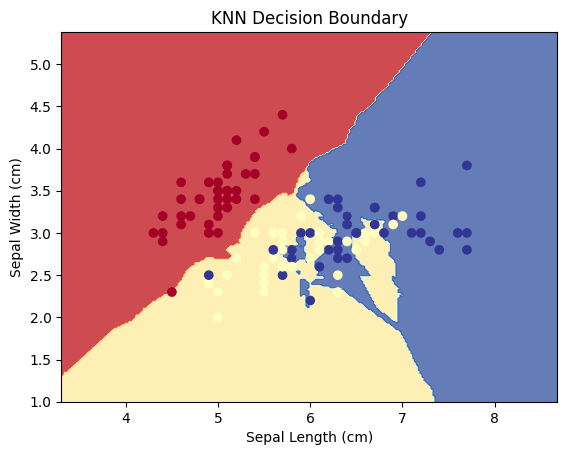

In [16]:
# Visualize the boundaries
plot_decision_boundary(knn_clf, X_train, y_train, title="KNN Decision Boundary")

### Regression Task

#### Exercise 3: Linear regression
Load the diabetes dataset from sklearn and split it into train and test. Use only the BMI feature (check the dataset parameters to see which one it is).

In [ ]:
# Use the diabete dataset earlier
diabetes = datasets.load_diabetes()
X = diabetes['data'][:, 2].reshape(-1, 1)
y = diabetes['target']

# Split the diabete dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a Linear Regression Model with `sklearn.linear_model.LinearRegression()` and train it using the `fit()` function.

In [27]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

Make predictions using the `predict()` function and compare the results with the target values.

In [28]:
# Make predictions and compare
y_pred = lr_reg.predict(X_test)
print("Predicted values", y_pred)
print("Target values", y_test)

Predicted values [145.80622687 188.85739048 147.95878505 203.92529774 131.8145987
 127.50948234 322.31599764 197.4676232   61.85645785 167.33180868
 118.89924962  94.14483055  90.91599328 166.25552959  96.29738873
 157.64529687 223.29832136 240.5187868  180.24715776 210.38297228
 191.00994866 109.21273781 102.75506327 174.86576231 196.39134411
 166.25552959 211.45925137 133.96715688  78.0006442  130.73831961
 244.82390316 114.59413326 166.25552959 145.80622687 192.08622775
 229.7559959  121.0518078  118.89924962 121.0518078   94.14483055
  82.30576056 122.12808689 129.66204052 118.89924962 107.06017963
 116.74669144 115.67041235 101.67878418  67.2378533  153.34018051
 210.38297228  82.30576056 169.48436686 111.36529599 133.96715688
 216.84064682 105.98390054 213.61180955 133.96715688  97.37366782
 182.39971594 193.16250684 206.07785592 107.06017963  86.61087692
 170.56064595 140.42483142 127.50948234 117.82297053 139.34855233
 133.96715688 182.39971594 130.73831961 141.50111051  90.915

Try making a scatter plot with the data point and the linear regression line.

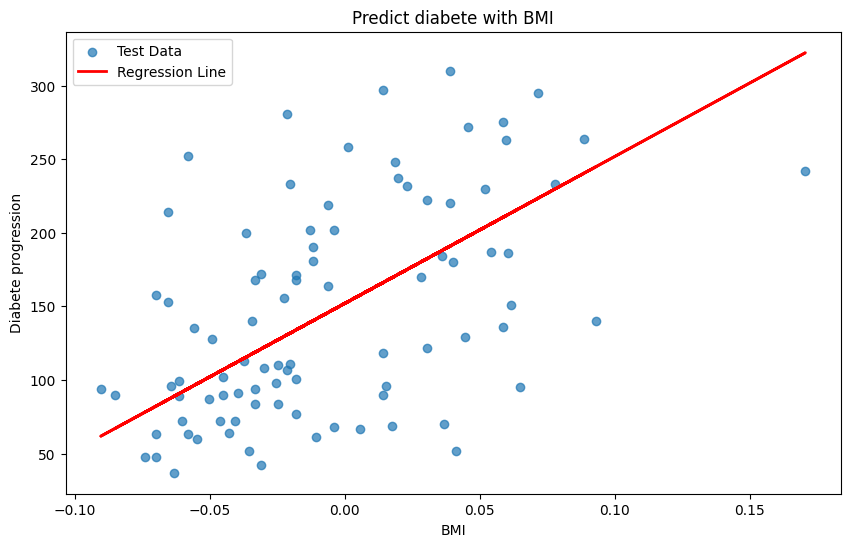

In [29]:
# Plot the regression line and the test data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Test Data", alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel(f"BMI")
plt.ylabel("Diabete progression")
plt.title("Predict diabete with BMI")
plt.legend()
plt.show()

## Task 2: Understanding Metrics

### Classification Metrics
- **Accuracy**: The proportion of correct predictions out of all predictions.
- **Precision**: The proportion of true positives among the predicted positives.
- **Recall**: The proportion of true positives among the actual positives.
- **F1-Score**: The harmonic mean of precision and recall, useful for imbalanced datasets.

### Regression Metrics
- **Mean Squared Error (MSE)**: The average squared difference between predicted and actual values. Penalizes larger errors more.
- **Mean Absolute Error (MAE)**: The average absolute difference between predicted and actual values.
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains the variance in the target. Values closer to 1 mean better fit.

---

### Exercise 4: Classification metrics

Calculate and interpret the following metrics: Accuracy, Precision, Recall, and F1-Score using the Iris dataset with k-NN model.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Split the Iris dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Calculate and print Accuracy, Precision, Recall and F1-Score
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print("Accuracy (Decision Tree):", accuracy)
print("Precision (Decision Tree):", precision)
print("Recall (Decision Tree):", recall)
print("F1-Score (Decision Tree):", f1)

# Calculate all of these using Classification Report
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_knn))

Accuracy (Decision Tree): 1.0
Precision (Decision Tree): 1.0
Recall (Decision Tree): 1.0
F1-Score (Decision Tree): 1.0

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Exercise 5: Regression metrics

Calculate and interpret MSE, MAE, and R² Score using the California Housing dataset with Linear Regression.

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ULoad the California dataset
california = datasets.fetch_california_housing()
X = california['data']
y = california['target']

# Split the California Housing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_reg.predict(X_test)

# Calculate the mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse)

# Calculate the mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error (Linear Regression):", mae)

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred_lr)
print("R² Score (Linear Regression):", r2)

Mean Squared Error (Linear Regression): 0.5558915986952422
Mean Absolute Error (Linear Regression): 0.533200130495698
R² Score (Linear Regression): 0.5757877060324524
